# Projeto Final IA

## Etapa 1

### Setup | Dependências

In [108]:
from pandas import DataFrame
from matplotlib import pyplot


### Loading Dataset

In [97]:
from pathlib import Path
import csv
from typing import TypedDict, List, Tuple

fp = "../data/MotorUniversal_2k_5kHz_SemNorm.xlsx - TesteMotorUniversalAgoraVai2000.csv"


def parse_num(s: str) -> float:
    a = s.replace(",", ".")
    try:
        return float(a)
    except:
        return float("NaN")


class RelData(TypedDict):
    teste: int
    estado: int
    corrente: List[Tuple[int, float]]
    tensao: List[Tuple[int, float]]


class Data(TypedDict):
    id_teste: List[int]
    estado: List[int]
    corrente: List[float]
    tensao: List[float]
    iter_corrente: List[int]
    iter_tensao: List[int]


data: Data = {
    "id_teste": list(),
    "estado": list(),
    "corrente": list(),
    "tensao": list(),
    "iter_corrente": list(),
    "iter_tensao": list(),
}

data_rel: List[RelData] = list()
with Path(fp).open("r") as fd:
    file_data = csv.reader(fd, delimiter=",")
    next(file_data)
    for index, line in enumerate(file_data):
        correntes = list(map(parse_num, line[1:1001]))
        tensoes = list(map(parse_num, line[1001:]))
        estado = int(line[0])
        assert len(correntes) == len(tensoes)
        test_iters = list(range(1, len(tensoes) + 1))
        assert len(test_iters) == len(tensoes)

        data.update(Data(
            id_teste=[*data["id_teste"], *[index]*len(tensoes)],
            estado=[*data["estado"], *[estado]*len(tensoes)],
            corrente=[*data["corrente"], *correntes],
            tensao=[*data["tensao"], *tensoes],
            iter_corrente=[*data["iter_corrente"], *test_iters],
            iter_tensao=[*data["iter_tensao"], *test_iters],
        ))

        data_rel.append({
            "teste": index,
            "estado": estado,
            "corrente": list(map(lambda v: (v[0], v[1]), enumerate(correntes))),
            "tensao": list(map(lambda v: (v[0], v[1]), enumerate(tensoes)))
        })


### Metrics

In [98]:
df = DataFrame(data)


In [99]:
df.melt(id_vars=("id_teste", "iter_tensao"), value_vars=("tensao",)).describe()


,id_teste,iter_tensao,value
count,500000.000000,500000.000000,499991.000000
mean,249.500000,500.500000,21.969585
std,144.337423,288.675279,2.419560
min,0.000000,1.000000,0.234658
25%,124.750000,250.750000,21.124460
50%,249.500000,500.500000,21.756133
75%,374.250000,750.250000,22.589790
max,499.000000,1000.000000,1214.356000


In [100]:
df.pivot(index="iter_tensao", columns="id_teste", values="tensao").describe()


id_teste,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,22.151397,22.066898,22.070464,22.012264,22.076911,22.086048,22.088501,22.069895,22.074107,22.080849,...,21.997622,22.045427,22.053560,22.050715,22.050948,22.086528,22.053290,22.061742,22.079134,22.038410
std,2.915630,0.698623,0.695412,0.714062,0.728945,0.730893,0.746671,0.756620,0.763320,0.784453,...,2.091182,2.007481,2.018028,1.969090,1.993388,2.001745,1.994681,1.983864,1.972268,2.053530
min,20.717903,20.797650,20.874197,20.803209,20.865724,20.877126,20.870344,20.873758,20.832422,20.820335,...,1.239898,18.977551,18.947160,19.033020,19.047472,19.032604,18.970641,19.016752,19.064274,1.256898
25%,21.526676,21.530811,21.536247,21.479250,21.538106,21.531678,21.507696,21.499697,21.479303,21.470685,...,21.219168,21.219063,21.205085,21.242107,21.199334,21.218938,21.214786,21.201252,21.226715,21.101819
50%,21.974925,22.007237,21.998154,21.923127,21.977113,21.995395,21.994404,21.966825,21.952544,21.971979,...,21.718853,21.745502,21.720639,21.719322,21.702417,21.729746,21.692819,21.709380,21.709244,21.725131
75%,22.457895,22.442913,22.424075,22.342813,22.441266,22.480050,22.474652,22.478748,22.498998,22.500855,...,22.290222,22.356341,22.364587,22.326704,22.380519,22.439204,22.408607,22.415059,22.420673,22.583533
max,111.454900,24.476110,24.456592,24.547889,24.573959,24.551453,24.530846,24.530196,24.580099,24.717669,...,39.041094,38.939503,38.781628,38.539464,38.677322,38.675231,38.465177,38.360738,38.152791,37.754298


In [107]:
df.melt(id_vars=("id_teste", "iter_corrente"),
        value_vars=("corrente",)).describe()


,id_teste,iter_corrente,value
count,500000.000000,500000.000000,499986.000000
mean,249.500000,500.500000,0.732191
std,144.337423,288.675279,0.096716
min,0.000000,1.000000,0.595338
25%,124.750000,250.750000,0.680154
50%,249.500000,500.500000,0.700813
75%,374.250000,750.250000,0.730608
max,499.000000,1000.000000,11.554880


In [102]:
df.pivot(index="iter_corrente", columns="id_teste",
         values="corrente").describe()


id_teste,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
count,1000.000000,1000.000000,998.000000,1000.000000,1000.000000,1000.000000,1000.000000,999.000000,999.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.683705,0.679833,0.690525,0.692794,0.680013,0.672279,0.673860,0.676992,0.675490,0.673339,...,0.715595,0.704115,0.704142,0.690316,0.690762,0.685177,0.692129,0.690922,0.686268,0.708508
std,0.005013,0.004669,0.122341,0.004744,0.004832,0.004811,0.004587,0.004863,0.004762,0.005043,...,0.018205,0.018885,0.017938,0.019413,0.019412,0.018875,0.019304,0.018319,0.020212,0.016834
min,0.672482,0.669572,0.674844,0.680766,0.667668,0.660557,0.662690,0.665733,0.663650,0.660938,...,0.678049,0.665664,0.666970,0.658474,0.658636,0.649102,0.660005,0.654469,0.652661,0.671933
25%,0.680375,0.676781,0.683417,0.689551,0.676739,0.669083,0.670774,0.673734,0.672259,0.669908,...,0.699961,0.686649,0.687772,0.671092,0.671230,0.667231,0.672554,0.673931,0.664508,0.695551
50%,0.683377,0.679917,0.686834,0.692981,0.680266,0.672396,0.674042,0.677186,0.675597,0.673585,...,0.718886,0.708246,0.707925,0.691913,0.692294,0.689260,0.693982,0.694323,0.689389,0.715114
75%,0.686814,0.682305,0.689457,0.695513,0.682793,0.675312,0.676769,0.680126,0.678364,0.676616,...,0.731750,0.720462,0.719682,0.708924,0.709249,0.701670,0.710279,0.706549,0.704864,0.720723
max,0.717573,0.719402,4.548630,0.729627,0.714636,0.709658,0.705956,0.714153,0.712675,0.707592,...,0.754034,0.749894,0.737908,0.723822,0.724950,0.722422,0.726260,0.726733,0.747386,0.740270


### Scatter Plot

In [103]:
def get_color_by_state(estado: int) -> str:
    match estado:
        case 0: return "green"
        case 1: return "blue"
        case 2: return "red"
    return "yellow"

def plot_scatter(data_rel: List[RelData]):
    fig = pyplot.figure()
    ax = fig.add_subplot(projection="3d")

    for d in data_rel:
        x = list(map(lambda v: v[1], d['corrente']))
        z = list(map(lambda v: v[1], d['tensao']))
        y = list(map(lambda v: v[0], d['corrente']))
        color = get_color_by_state(d["estado"])
        ax.scatter(x, y, z, color=color)

    ax.set_xlabel("Corrente")
    ax.set_ylabel("Teste")
    ax.set_zlabel("Tensão")  # type: ignore

    fig.tight_layout()

    fig_2 = pyplot.figure()
    ax_2 = fig_2.add_subplot(projection="3d")

    for d in data_rel:
        z = list(map(lambda v: v[1], d['corrente']))
        x = list(map(lambda v: v[1], d['tensao']))
        y = list(map(lambda v: v[0], d['corrente']))
        color = get_color_by_state(d["estado"])
        ax_2.scatter(x, y, z, color=color)

    ax_2.set_xlabel("Tensão")
    ax_2.set_ylabel("Teste")
    ax_2.set_zlabel("Corrente")  # type: ignore

    fig_2.tight_layout()

Axes3DSubplot


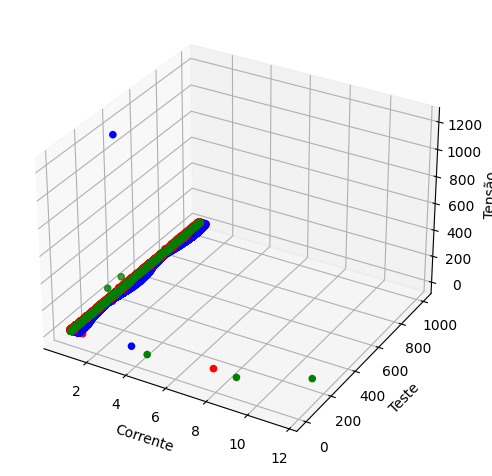

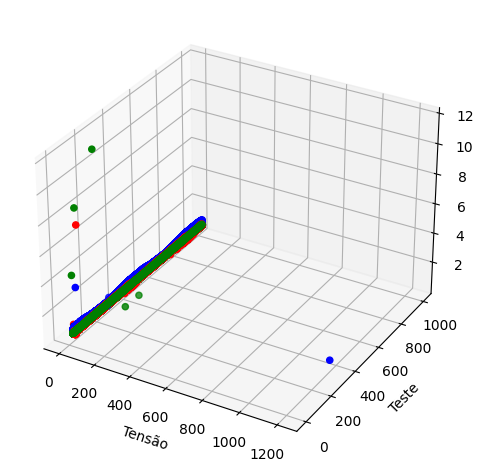

In [104]:
plot_scatter(data_rel)

## Limpeza

## Scatter Plot Limpo

Axes3DSubplot


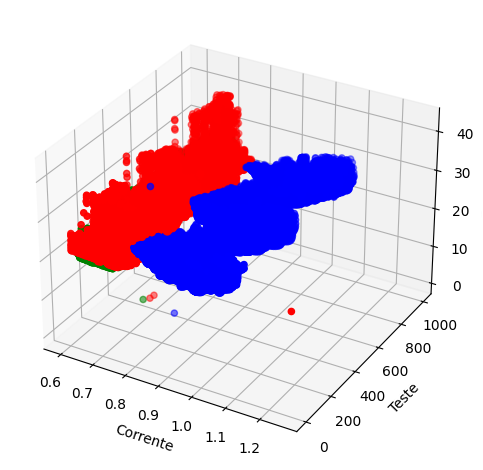

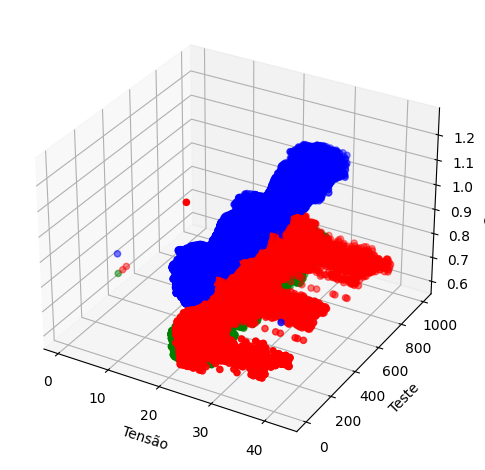

In [105]:
clean_data_rel: List[RelData] = list()

for d in data_rel:
    t = list(filter(lambda v: v[1] < 75, d["tensao"]))
    c = list(filter(lambda v: v[1] < 2, d["corrente"]))
    t = list(filter(lambda v: v[0] in list(map(lambda x: x[0], c)), t))
    c = list(filter(lambda v: v[0] in list(map(lambda x: x[0], t)), c))
    assert len(c) == len(t), f"{c} {t}"
    clean_data_rel.append({
        'teste': d["teste"],
        'estado': d["estado"],
        'tensao': t,
        'corrente': c
    })

plot_scatter(clean_data_rel)


### Testes